## Experiment No.5 : Logistic Regression 
### Name: Vighnesh Babasaheb Sankpal
### Roll Number : 10

### Import the Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

### Read Dataset 

In [2]:
raw_data = pd.read_csv("../datasets/titanic.csv")

### Data Preprocessing 

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
raw_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
raw_data['Age']=raw_data['Age'].fillna(raw_data['Age'].median())

In [7]:
raw_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [8]:
raw_data['Embarked']=raw_data['Embarked'].fillna('S')

In [9]:
# Dropping Column which not used for training model
raw_data.drop(['PassengerId','Cabin','Name','Ticket','Embarked'],axis=1,inplace=True)

In [10]:
#encode the object type column
raw_data['Is_male']=pd.get_dummies(raw_data['Gender'],drop_first=True,dtype=int)
raw_data.drop(['Gender'],axis=1,inplace=True)

In [11]:
data = raw_data.copy()

<Axes: >

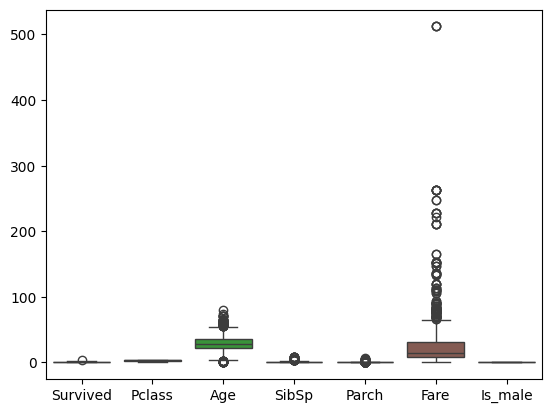

In [12]:
sns.boxplot(data)

In [13]:
columns = ['Fare','Age']
for col in columns:
    Q1 = data['Fare'].quantile(0.25)
    Q3 = data['Fare'].quantile(0.75)
    iqr = Q3-Q1
    lower_bound = Q1-1.5*iqr
    upper_bound = Q3+1.5*iqr
    
    data = data[(data[col]<upper_bound) & (data[col]>lower_bound)]

<Axes: >

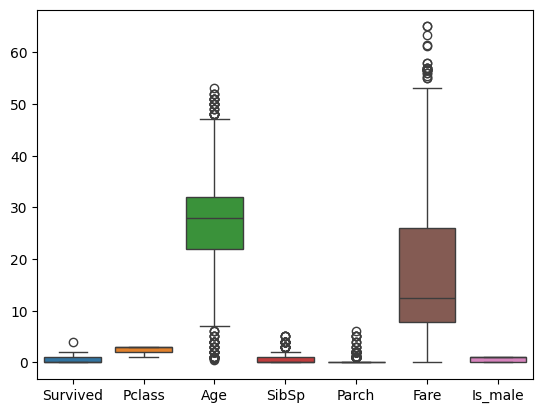

In [14]:
sns.boxplot(data)

In [15]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male
0,0,3,22.0,1,0,7.2500,1
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
5,0,3,28.0,0,0,8.4583,1


### Analys the data

In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male
count,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,0.356852,2.521031,27.084464,0.454545,0.351425,17.477549,0.677069
std,0.498841,0.708953,10.638921,0.916876,0.795692,13.441432,0.467914
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,12.475000,1.000000
75%,1.000000,3.000000,32.000000,1.000000,0.000000,26.000000,1.000000
max,4.000000,3.000000,53.000000,5.000000,6.000000,65.000000,1.000000


In [17]:
data.loc[data['Survived']>1]

,Survived,Pclass,Age,SibSp,Parch,Fare,Is_male
24,2,3,8.0,3,1,21.075,0
26,4,3,28.0,0,0,7.225,1


In [18]:
data.loc[(data['Survived']>1),'Survived']=1

### Define input & output 

In [19]:
x_features = data.drop('Survived',axis=1)
y_feature = data['Survived']


In [20]:
# Split data into random train and test subsets.
x_train,x_test,y_train,y_test =train_test_split(x_features,
                                                y_feature,
                                                train_size=0.8,
                                                random_state=23)

In [21]:
print('x_train.shape = ',x_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_train.shape = ',y_train.shape)
print('y_train.shape = ',y_test.shape)

x_train.shape =  (589, 6)
x_test.shape =  (148, 6)
y_train.shape =  (589,)
y_train.shape =  (148,)


### Initialize the model

In [22]:
 # Create and train the logistic regression model
clf = LogisticRegression(max_iter=1000, random_state=0)

### Fit the dataset  

In [23]:
clf.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Evaluate the model 

In [24]:
y_pred = clf.predict(x_test)

In [25]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average='binary')
rec = recall_score(y_true=y_test,y_pred= y_pred, average='binary')
cm = confusion_matrix(y_test, y_pred)

In [26]:
print("Accuracy Score:", acc)
print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("Confusion Matrix :\n",cm)

Accuracy Score: 0.7905405405405406
Precision (macro): 0.6530612244897959
Recall (macro): 0.6956521739130435
Confusion Matrix :
 [[85 17]
 [14 32]]
